### 2021_10_28_1

## 비선형 변환

### 비선형 변환
* 제곱항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 된다.
* log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용.
* 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있음.
* log, exp 함수는 데이터의 스케일을 변경하여 선형 모델과 신경망을 올리는데 도움이 된다.

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [3]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

### 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
print(X_org.shape)

(1000, 3)


In [6]:
w = rnd.normal(size=3)
print(w.shape)

(3,)


In [7]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [8]:
print("값들의 출현 횟수 : ", np.bincount(X[:,0]))

값들의 출현 횟수 :  [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


* 2가 68번으로 가장 많이 나타나며. 큰 값의 수는 빠르게 줄어든다.
* 85, 86처럼 아주 큰 값도 약간은 있음

Text(0.5, 0, '값')

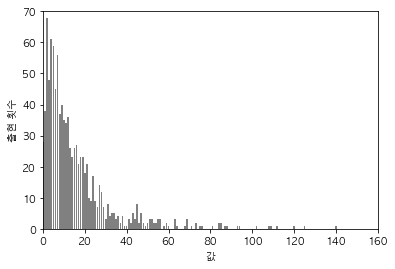

In [9]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

Text(0.5, 0, '값')

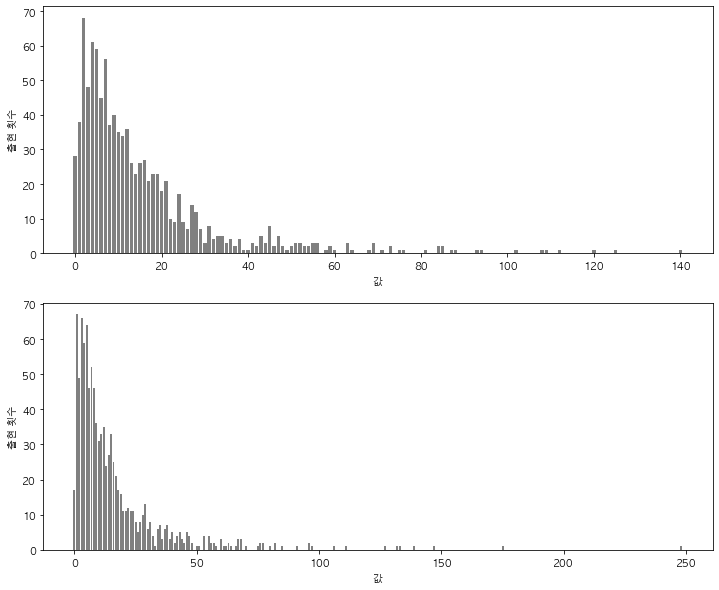

In [10]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

### 데이터를 리지 회귀(L1규제)에 적용

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.622


In [15]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값(log적용)')

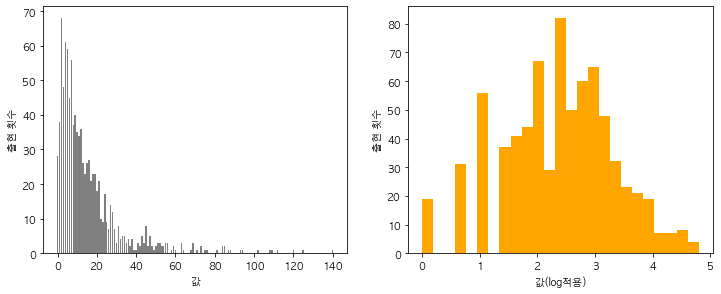

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

In [19]:
model = Ridge().fit(X_train_log, y_train)
score = model.score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


* 결정계수의 값이 0.622에서 0.875로 향상되었다.
* 선형모델, 나이브 베이즈 모델 같은 덜 복잡한 모델에서 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있다.